## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
# Import the dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file and the `coinbase.csv` file from the Resources folder. 

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters

bitstamp = pd.read_csv(Path("./Resources/bitstamp.csv"), 
                    index_col = 'Timestamp',
                    parse_dates = True,
                    infer_datetime_format = True)


In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
display(bitstamp.head())
display(bitstamp.tail())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(Path("./Resources/coinbase.csv"), 
                    index_col = 'Timestamp',
                    parse_dates = True,
                    infer_datetime_format = True)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
display(coinbase.head())
display(coinbase.tail())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp["Close"] = bitstamp["Close"].str.replace("$","")

C:\Users\abhis\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
bitstamp["Close"] = bitstamp["Close"].astype('float')
bitstamp["Close"].dtypes

dtype('float64')

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase = coinbase.dropna()
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [11]:
coinbase["Close"] = coinbase["Close"].str.replace("$","")

C:\Users\abhis\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [12]:
coinbase["Close"] = coinbase["Close"].astype('float')
coinbase["Close"].dtypes

dtype('float64')

In [13]:
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [14]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,["Close"]]
# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [15]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,["Close"]]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [16]:
#summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [17]:
# summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp'}, xlabel='Timestamp'>

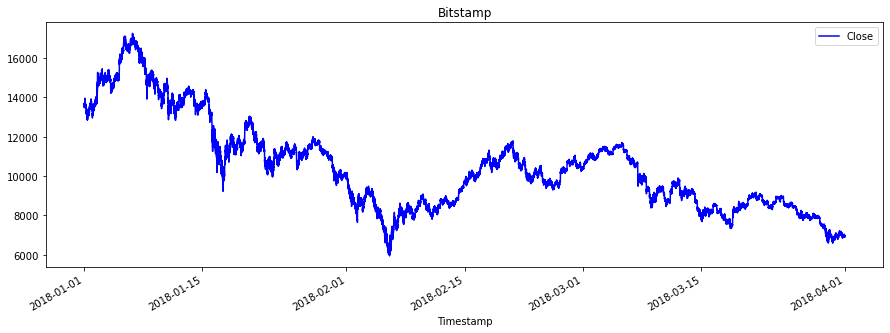

In [18]:
# line plot for the bitstamp DataFrame for the full length of time in the dataset 
bitstamp_sliced.plot(figsize=(15,5), title = "Bitstamp", color = 'blue')

<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

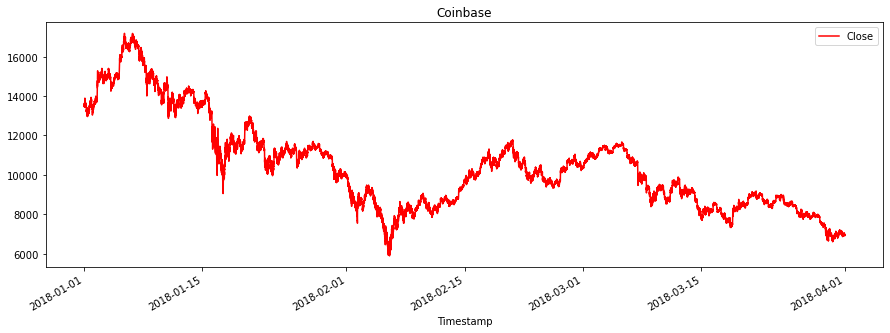

In [19]:
# line plot for the coinbase DataFrame for the full length of time in the dataset 
coinbase_sliced.plot(figsize = (15,5), title = "Coinbase", color = 'red')

<AxesSubplot:title={'center':'Bitstamp Vs Coinbase'}, xlabel='Timestamp'>

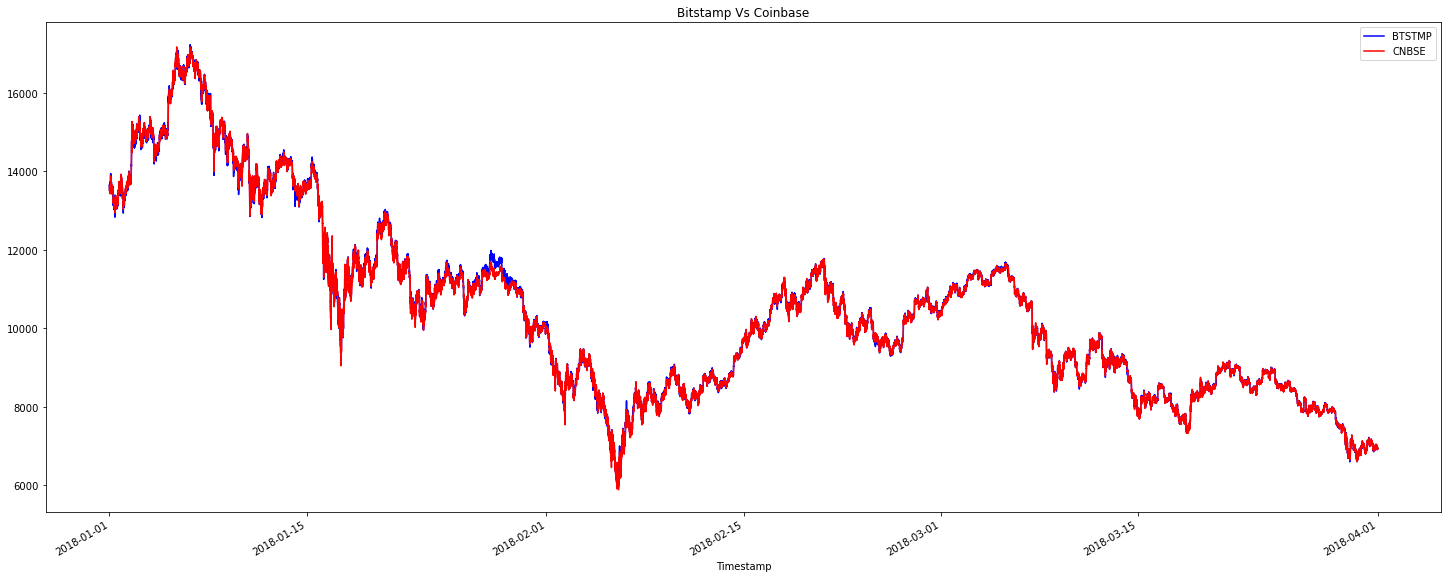

In [62]:
# visualizations overlay for the bitstamp and coinbase DataFrames in one plot
# The plot visualizes the prices over the full lenth of the dataset
bitstamp_sliced['Close'].plot(legend = True, figsize = (25,10), title = 'Bitstamp Vs Coinbase', color = 'blue', label = 'BTSTMP')
coinbase_sliced['Close'].plot(legend = True, figsize = (25,10), title = 'Bitstamp Vs Coinbase', color = 'red', label = 'CNBSE')

<AxesSubplot:title={'center':'Bitstamp Vs Coinbase - Jan 2018'}, xlabel='Timestamp'>

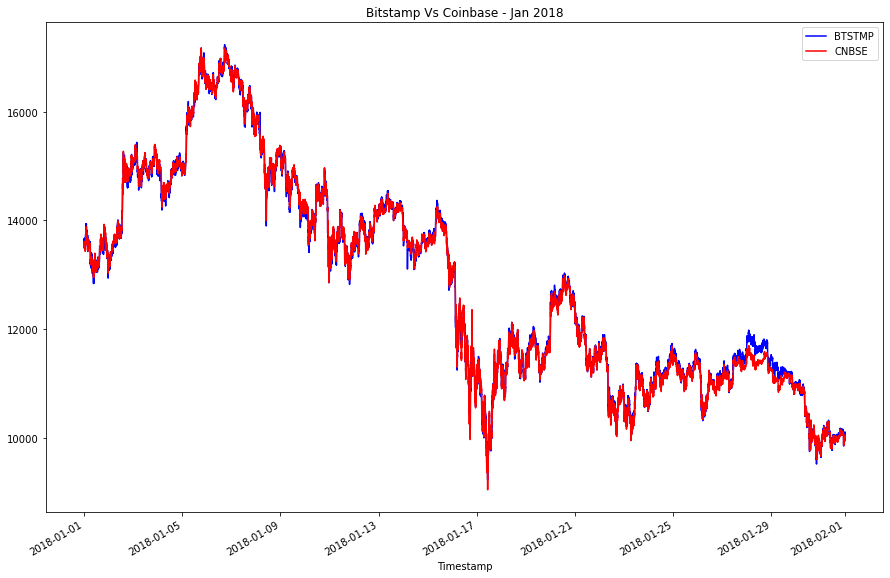

In [21]:
# An overlay plot that visualizes the price action of both DataFrames for a one month period early in the dataset
bitstamp_sliced.loc['2018-01','Close'].plot(legend = True, figsize = (15,10), title = 'Bitstamp Vs Coinbase - Jan 2018', color = 'blue', label = 'BTSTMP')
coinbase_sliced.loc['2018-01','Close'].plot(legend = True, figsize = (15,10), title = 'Bitstamp Vs Coinbase - Jan 2018', color = 'red', label = 'CNBSE')

<AxesSubplot:title={'center':'Bitstamp Vs Coinbase - Mar 2018'}, xlabel='Timestamp'>

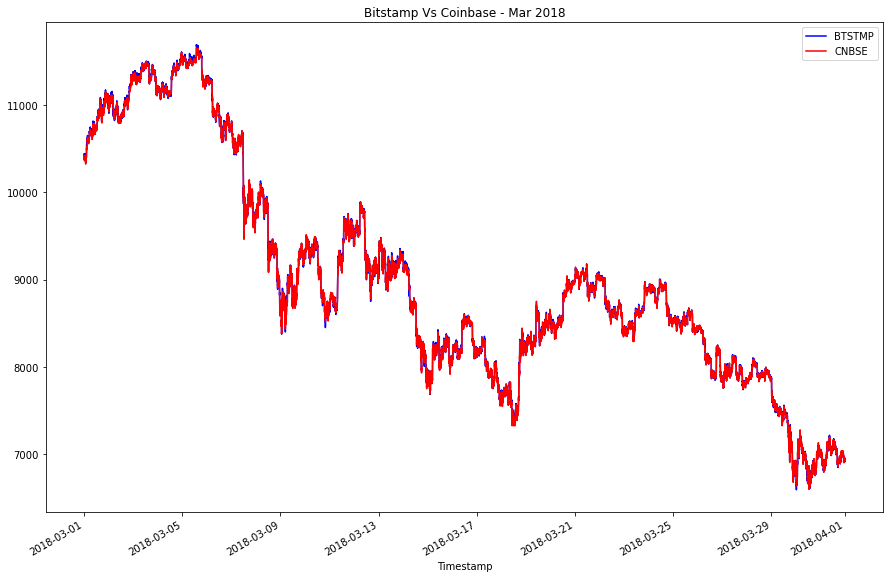

In [22]:
# an overlay plot that visualizes the price action of both DataFrames for a one month period later in the dataset
bitstamp_sliced.loc['2018-03','Close'].plot(legend = True, figsize = (15,10), title = 'Bitstamp Vs Coinbase - Mar 2018', color = 'blue', label = 'BTSTMP')
coinbase_sliced.loc['2018-03','Close'].plot(legend = True, figsize = (15,10), title = 'Bitstamp Vs Coinbase - Mar 2018', color = 'red', label = 'CNBSE')

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Based on the visualizations of the two time periods, the degree of spread has reduced as time progressed. During the earlier time period, the spread between the two exchanges was more than visible than in the later time period. 

### Step 3: Focus Your Analysis on Specific Dates

### Early Date : Jan 8th 2018

<AxesSubplot:title={'center':'Jan 08 2018'}, xlabel='Timestamp'>

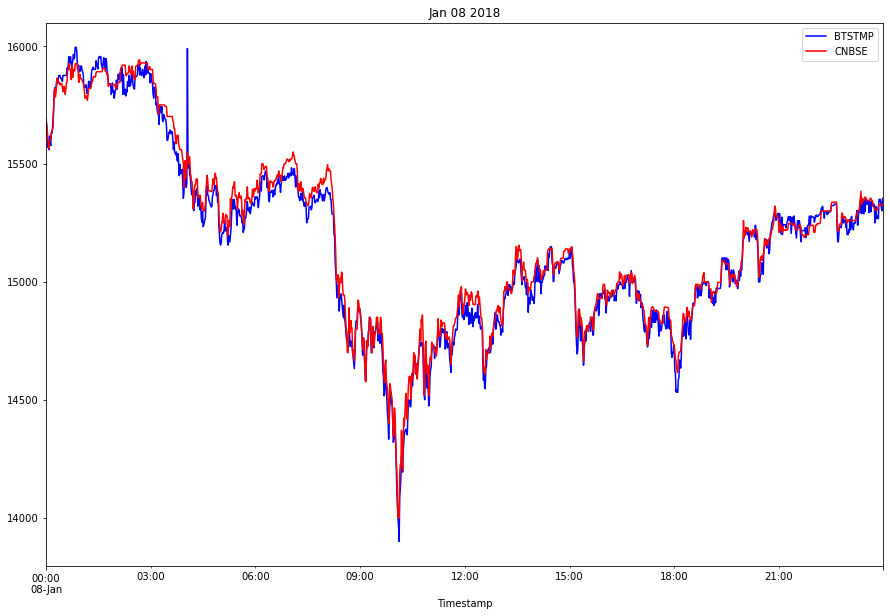

In [23]:
# An overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
bitstamp_sliced['Close'].loc['2018-01-08'].plot(legend = True, figsize = (15,10), title = 'Jan 08 2018', color = 'blue', label = 'BTSTMP')
coinbase_sliced['Close'].loc['2018-01-08'].plot(legend = True, figsize = (15,10), title = 'Jan 08 2018', color = 'red', label = 'CNBSE')

In [24]:
# Arbitrage Spread calculations for the early date in the data
#For the selected date we see that the bitstamp prices (data in blue) are lower for a major part of the day than the coinbase price (data in red).
# So Arbitrage Price = Higher Exchage Price - Lower Exchange Price
arbitrage_spread_early = coinbase['Close'].loc['2018-01-08'] - bitstamp['Close'].loc['2018-01-08']

# Summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1440.000000
mean       26.727347
std        40.193978
min      -439.050000
25%        -0.022500
50%        27.435000
75%        54.002500
max       155.410000
Name: Close, dtype: float64

<AxesSubplot:title={'center':' Arbitrage spread for Jan 08 '}>

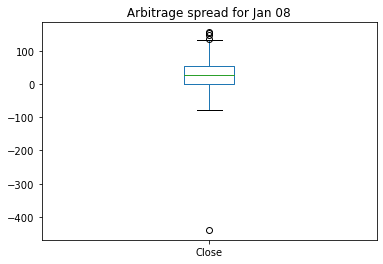

In [25]:
# Arbitrage spread from early in the dataset visualized in a box plot
arbitrage_spread_early.plot(kind = 'box', title = " Arbitrage spread for Jan 08 ")

### A summary of the spread for Jan 08 shows a mean arbitrage profit of $26. There are some negative values in the spread indicating that at that point of time the price of Bitcoin at  Coinbase was lower than that at Bitstamp. 

### Middle Date - Jan 28 2018

<AxesSubplot:title={'center':'Jan 28 2018'}, xlabel='Timestamp'>

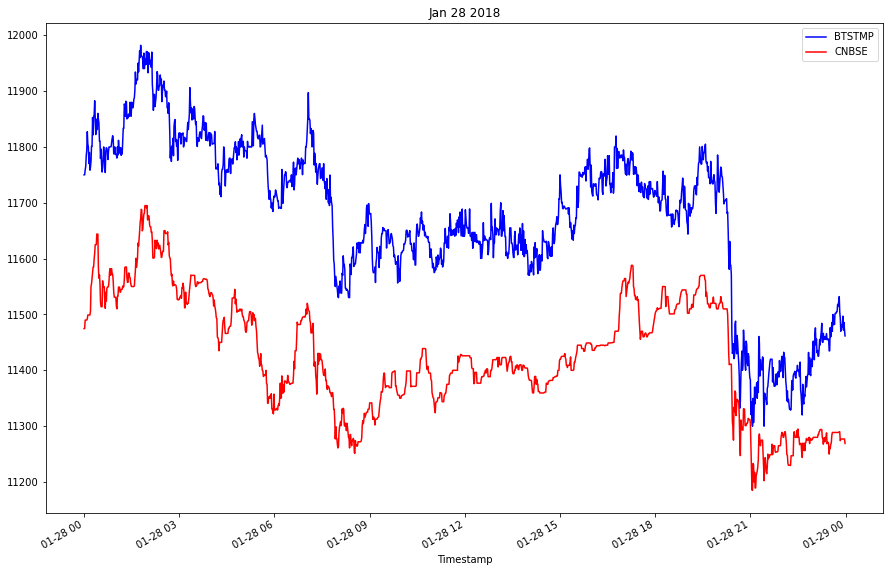

In [26]:
# An overlay plot that visualizes the two dataframes over a period of one day from the middle in the dataset. 
bitstamp_sliced['Close'].loc['2018-01-28'].plot(legend = True, figsize = (15,10), title = 'Jan 28 2018', color = 'blue', label = 'BTSTMP')
coinbase_sliced['Close'].loc['2018-01-28'].plot(legend = True, figsize = (15,10), title = 'Jan 28 2018', color = 'red', label = 'CNBSE')

In [27]:
# Arbitrage Spread for a date in the middle part of the data set 
# Generated by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp['Close'].loc['2018-01-28'] - coinbase['Close'].loc['2018-01-28']

# Summary statistics 
arbitrage_spread_middle.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':' Arbitrage spread for Jan 28'}>

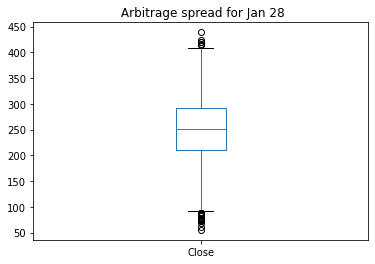

In [28]:
# Arbitrage spread from the middle of the dataset visualized in a box plot visulization
arbitrage_spread_middle.plot(kind = 'box', title = " Arbitrage spread for Jan 28")

### A summary of the spread for Jan 28 shows a mean arbitrage profit of $247.55. All the values are positive indicating that at all points of time the price of Bitcoin at Coinbase was lower than that at Bitstamp. 

### Late Date March 20th 2018

<AxesSubplot:title={'center':'Mar 20 2018'}, xlabel='Timestamp'>

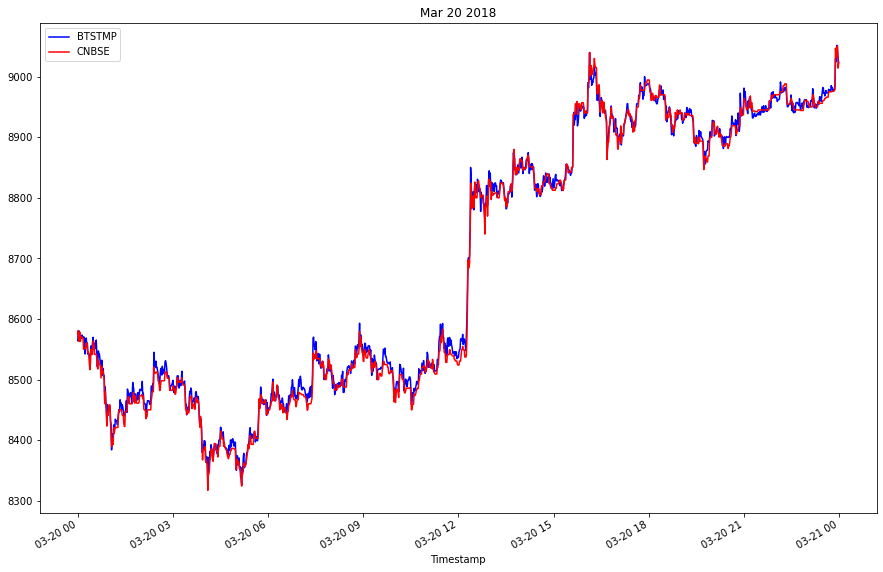

In [29]:
# Arbitrage Spread for a date in the later part of the data set 
# Generated by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
bitstamp_sliced['Close'].loc['2018-03-20'].plot(legend = True, figsize = (15,10), title = 'Mar 20 2018', color = 'blue', label = 'BTSTMP')
coinbase_sliced['Close'].loc['2018-03-20'].plot(legend = True, figsize = (15,10), title = 'Mar 20 2018', color = 'red', label = 'CNBSE')

In [30]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp['Close'].loc['2018-03-20'] - coinbase['Close'].loc['2018-03-20']

# Summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1432.000000
mean        4.572556
std         9.269393
min       -27.930000
25%        -1.477500
50%         4.825000
75%        10.962500
max        59.950000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread for Mar 20 '}>

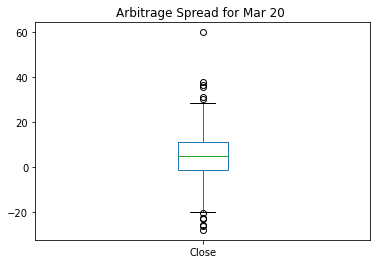

In [31]:
# Arbitrage spread from late in the dataset visualized in a box plot
arbitrage_spread_late.plot(kind = 'box', title = "Arbitrage Spread for Mar 20 ")

### A summary of the spread for Mar 20 shows a mean arbitrage profit of $4.82. A little over 25% of the values are negative indicating that at that point of time the price of Bitcoin at  Bitstamp was lower than that at Coinbase. We also see that the profit margins in this later date has significantly reduced as compared to the middle and earlier part of the data set.

### Step 4: Calculate the Arbitrage Profits



#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

### Early Date - Jan 08 

In [32]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase['Close'].loc['2018-01-08'] - bitstamp['Close'].loc['2018-01-08']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early>0].describe()

count    1070.000000
mean       43.628869
std        28.211180
min         0.010000
25%        20.067500
50%        40.705000
75%        61.442500
max       155.410000
Name: Close, dtype: float64

### Middle Date - Jan 28

In [33]:
# For the middle date in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = bitstamp_sliced['Close'].loc['2018-01-28'] - coinbase['Close'].loc['2018-01-28']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle[arbitrage_spread_middle>0].describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

### Late Date - Mar 20

In [34]:
# For the date later in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = bitstamp_sliced['Close'].loc['2018-03-20'] - coinbase['Close'].loc['2018-03-20']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_late[arbitrage_spread_late>0].describe()

count    980.000000
mean       9.290367
std        6.611229
min        0.010000
25%        4.240000
50%        8.440000
75%       13.165000
max       59.950000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns.

### Early date - Jan 08

In [35]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp['Close'].loc['2018-01-08']

# Review the spread return DataFrame
display(spread_return_early.head())
display(spread_return_early.tail())

Timestamp
2018-01-08 00:00:00         NaN
2018-01-08 00:01:00         NaN
2018-01-08 00:02:00    0.000687
2018-01-08 00:03:00    0.001854
2018-01-08 00:04:00    0.000710
Name: Close, dtype: float64

Timestamp
2018-01-08 23:55:00         NaN
2018-01-08 23:56:00    0.000763
2018-01-08 23:57:00    0.001701
2018-01-08 23:58:00         NaN
2018-01-08 23:59:00         NaN
Name: Close, dtype: float64

### A close review of the data frame reveals that our boolean filter eliminates all the negative values which would have incurred losses. Also the percentage profit for this early dataset is quite low ( less than 1%). 

### Middle Date - Jan 28th

In [36]:
# For the middle date in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0] / coinbase['Close'].loc['2018-01-28']

# Review the spread return DataFrame
display(spread_return_middle.head())
display(spread_return_middle.tail())

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

Timestamp
2018-01-28 23:55:00    0.019518
2018-01-28 23:56:00    0.017302
2018-01-28 23:57:00    0.018510
2018-01-28 23:58:00    0.017303
2018-01-28 23:59:00    0.017094
Name: Close, dtype: float64

### A close review of the data frame reveals that the percentage profit for the middle part of dataset is quite significant with profit values greater than 2%

### Late Date - Mar 20th

In [37]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0] / coinbase['Close'].loc['2018-03-20']

# Review the spread return DataFrame
display(spread_return_late.head())
display(spread_return_late.tail())

Timestamp
2018-03-20 00:00:00         NaN
2018-03-20 00:01:00         NaN
2018-03-20 00:02:00    0.001401
2018-03-20 00:03:00    0.001960
2018-03-20 00:04:00         NaN
Name: Close, dtype: float64

Timestamp
2018-03-20 23:55:00    0.001233
2018-03-20 23:56:00    0.000185
2018-03-20 23:57:00         NaN
2018-03-20 23:58:00    0.001857
2018-03-20 23:59:00    0.000092
Name: Close, dtype: float64

### A close review of the data frame reveals that our boolean filter eliminates all the negative values which would have incurred losses. Also the percentage profit for this early dataset is quite low ( less than 1%).

#### 3. For each of the three dates, narrow down your trading opportunities even further. 

### Early Date - Jan 08

In [38]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>0.01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-08 05:17:00    0.010226
2018-01-08 10:19:00    0.010637
Name: Close, dtype: float64

### Assuming a trading cost of 1%, we only get two profitable trades where profits exceed 1% trade-cost threshold for the early data set


### Middle Date - Jan 28

In [39]:
# For the middle date in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle>0.01]

# Review the first five profitable trades
profitable_trades_middle.head()

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

### Assuming a trading cost of 1%, there are significant number of profitable trades where profits exceed 1% trade-cost threshold for the middle data set

### Late Date - Mar 20

In [40]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late>0.01]

# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

### Assuming a trading cost of 1%, there are no profitable trades where profits exceed 1% trade-cost threshold for the late data set

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [41]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    2.000000
mean     0.010432
std      0.000291
min      0.010226
25%      0.010329
50%      0.010432
75%      0.010534
max      0.010637
Name: Close, dtype: float64

### For the early data set, there are only two profitable trades with a mean profit percentage of 1.04%

In [42]:
# For the middle date in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

### For the middle data set, there are 1378 profitable trades with a mean profit percentage of 2.22%

In [43]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

### For the late data set, there are no profitable trades

## We also observe that initially the average returns increase, but as more people realize the investment opportunity, with time lapse, the average returns start to diminish, eventually becoming zero in the later stages. 

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. 

### Early Date - Jan 08

In [44]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp['Close'].loc['2018-01-08']

# Drop any missing values from the profit DataFrame
profit_per_trade_early =profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()

Timestamp
2018-01-08 05:17:00    155.41
2018-01-08 10:19:00    152.91
Name: Close, dtype: float64

### Middle Date - Jan 28

In [45]:
# For the middle date in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp['Close'].loc['2018-01-28']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle =profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle.head()

Timestamp
2018-01-28 00:00:00    281.988859
2018-01-28 00:01:00    281.590414
2018-01-28 00:02:00    275.056978
2018-01-28 00:03:00    281.613252
2018-01-28 00:04:00    301.796040
Name: Close, dtype: float64

### Late Date - Mar 20

In [46]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitstamp['Close'].loc['2018-03-20']

# Drop any missing values from the profit DataFrame
profit_per_trade_late =profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late.head()

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [47]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count      2.000000
mean     154.160000
std        1.767767
min      152.910000
25%      153.535000
50%      154.160000
75%      154.785000
max      155.410000
Name: Close, dtype: float64

In [48]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count    1378.000000
mean      259.905405
std        64.817688
min       115.121956
25%       221.411421
50%       259.796909
75%       300.417942
max       455.916136
Name: Close, dtype: float64

In [49]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - Early Date - Jan 08 2018'}, xlabel='Timestamp'>

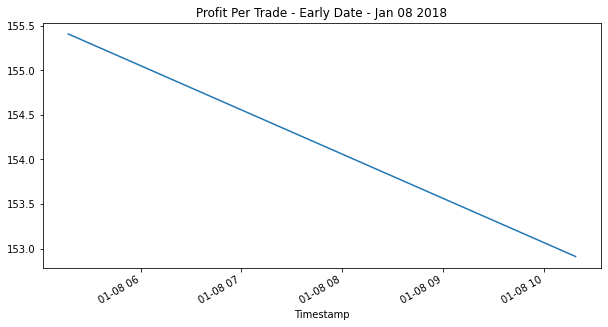

In [50]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize = (10,5), title = 'Profit Per Trade - Early Date - Jan 08 2018')

### We see here that with time the profit decreases within the same day

<AxesSubplot:title={'center':'Profit Per Trade - Middle Date - Jan 28 2018'}, xlabel='Timestamp'>

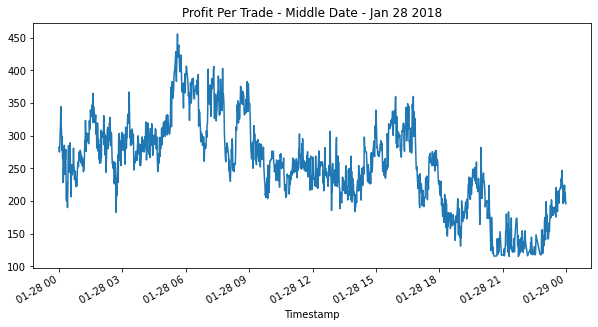

In [51]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(figsize = (10,5), title = 'Profit Per Trade - Middle Date - Jan 28 2018')

### We see here that similar to the early data set, with time the profit decreases within the same day

<AxesSubplot:title={'center':'Profit Per Trade - Late Date - Mar 20 2018'}, xlabel='Timestamp'>

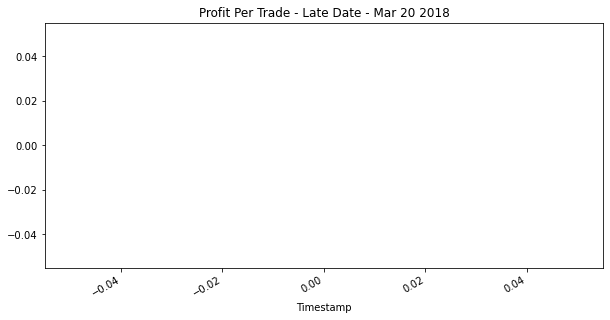

In [52]:
# Plot the results for the late profit per trade DataFrame
profit_per_trade_late.plot(figsize = (10,5), title = 'Profit Per Trade - Late Date - Mar 20 2018')

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [53]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_early = profit_per_trade_early.sum()
profit_early

308.3199999999997

In [54]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_middle = profit_per_trade_middle.sum()
profit_middle

358149.64796729136

In [55]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_late = profit_per_trade_late.sum()
profit_late

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [56]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

In [57]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()

In [58]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative sum - Early Date - Jan 08 2018'}, xlabel='Timestamp'>

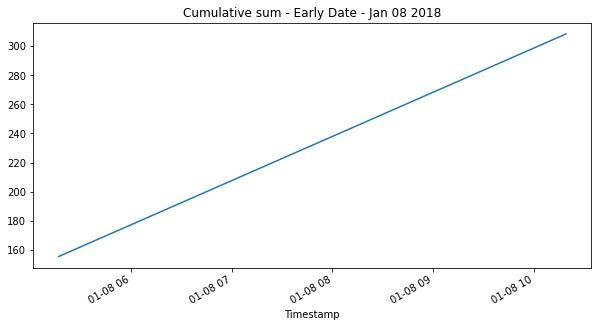

In [59]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize = (10,5), title = 'Cumulative sum - Early Date - Jan 08 2018')

<AxesSubplot:title={'center':'Cumulative sum - Middle Date - Jan 28 2018'}, xlabel='Timestamp'>

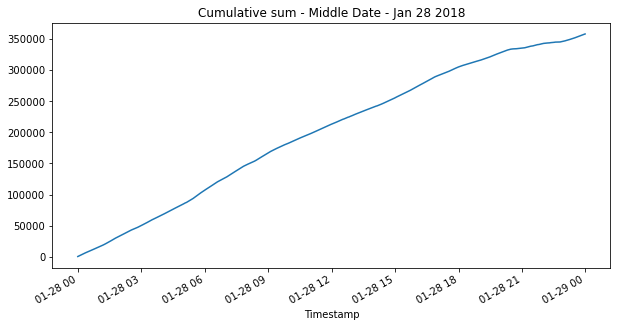

In [60]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_middle.plot(figsize = (10,5), title = 'Cumulative sum - Middle Date - Jan 28 2018')

<AxesSubplot:title={'center':'Cumulative sum - Late Date - Mar 20 2018'}, xlabel='Timestamp'>

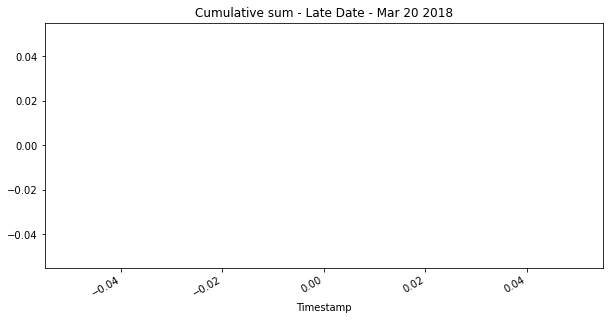

In [61]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_late.plot(figsize = (10,5), title = 'Cumulative sum - Late Date - Mar 20 2018')

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** After reviewing all the visualizations of profits, we can see a clear trend that with time, the profits decrease. The amount of profit in the early period increases as investors explore the arbitrage opportunities. As more and more investors start investing, the arbitrage gap closes and eventually become zero in the later part of the data set as we saw in our analysis with the later date of Mar 20 in our data set. Also within the same day, the profit margins are higher at the start of the day and they gradually decrease as the day progresses, which is evident by the slope of the cummulative sum plot. 